In [63]:
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
df=pd.read_csv("C:/Users/ADMIN/Downloads/029-ltv-level.csv")

In [65]:
df=df[df['the_level']<=100]

In [66]:
new_data = []

for uid in df['user_pseudo_id'].unique():
    for lvl in range(1, 101):
        new_data.append({'user_pseudo_id': uid, 'the_level': lvl})

new_df = pd.DataFrame(new_data)

In [67]:
# Lọc các dòng có the_pack là package.noads_pack
df_noads_pack = df[df['the_pack'] == 'package.noads_pack']

# Loại bỏ các dòng có the_level cao hơn cho mỗi user_pseudo_id và the_pack
df_noads_pack = df_noads_pack.sort_values(by=['user_pseudo_id', 'the_level']).drop_duplicates(subset=['user_pseudo_id', 'the_pack'], keep='first')

# Kết hợp lại với các dòng không phải package.noads_pack
df_other = df[df['the_pack'] != 'package.noads_pack']
df = pd.concat([df_noads_pack, df_other])

In [68]:
# Lọc các dòng có the_pack là package.noads_pack
df_noads_pack_2 = df[df['the_pack'] == 'package_no.ads.just.fun']

# Loại bỏ các dòng có the_level cao hơn cho mỗi user_pseudo_id và the_pack
df_noads_pack_2 = df_noads_pack_2.sort_values(by=['user_pseudo_id', 'the_level']).drop_duplicates(subset=['user_pseudo_id', 'the_pack'], keep='first')

# Kết hợp lại với các dòng không phải package.noads_pack
df_other = df[df['the_pack'] != 'package_no.ads.just.fun']
df = pd.concat([df_noads_pack_2, df_other])

In [69]:
df = df.drop(columns=['the_pack'])

In [70]:
merged_df = pd.merge(df, new_df, on=['user_pseudo_id', 'the_level'], how='outer')

# Thay thế các giá trị NaN bằng 0
merged_df = merged_df.fillna(0)

In [73]:
# Sắp xếp DataFrame theo user_pseudo_id và the_level
merged_df = merged_df.sort_values(by=['user_pseudo_id', 'the_level'])

# Tính giá trị the_value tích lũy theo user_pseudo_id và the_level
merged_df['cumulative_value'] = merged_df.groupby('user_pseudo_id')['the_value'].cumsum()

# Lấy chỉ số của các dòng có giá trị cumulative_value lớn nhất tại mỗi level và mỗi user
idx = merged_df.groupby(['user_pseudo_id', 'the_level'])['cumulative_value'].idxmax()

# Trích xuất các dòng tương ứng từ DataFrame ban đầu và ghi đè lên merged_df
merged_df = merged_df.loc[idx].reset_index(drop=True)


In [74]:
result_df = merged_df.groupby('the_level').agg(
user_count=('user_pseudo_id', 'nunique'),
total_cumulative_value=('cumulative_value', 'sum')
).reset_index()

In [75]:
result_df['average_cumulative_value'] = result_df['total_cumulative_value'] / result_df['user_count']

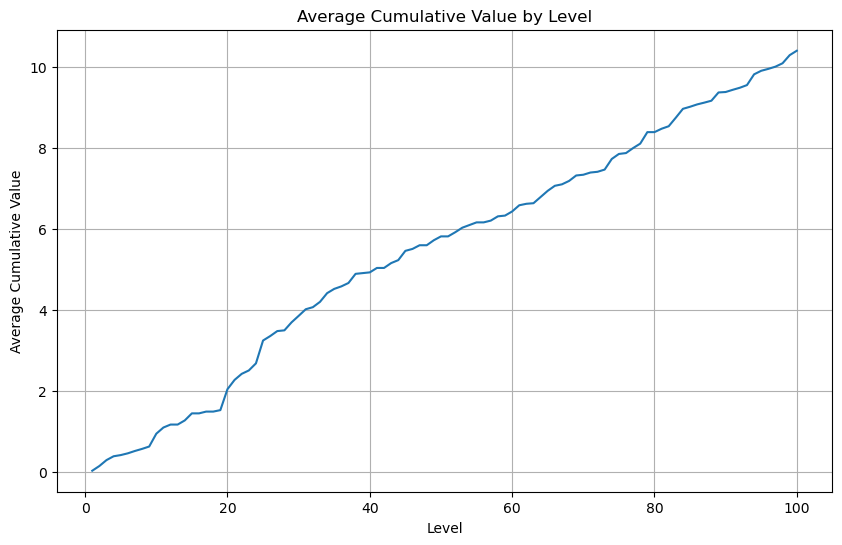

In [76]:
# Vẽ biểu đồ line chart
plt.figure(figsize=(10, 6))
plt.plot(result_df['the_level'], result_df['average_cumulative_value'], linestyle='-')
plt.xlabel('Level')
plt.ylabel('Average Cumulative Value')
plt.title('Average Cumulative Value by Level')
plt.grid(True)
plt.show()

In [49]:
# Đường dẫn đầy đủ để lưu file CSV
file_path = 'C:/Users/ADMIN/Downloads/result_df.csv'

# Xuất DataFrame ra file CSV
result_df.to_csv(file_path, index=False)